## Group 2A11
- 

## Group Contributions Statement

In [1]:
import seaborn as sns

## Data Import and Cleaning

In [2]:
#imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split

#getting the data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)


#splitting the data set
X=penguins[["Culmen Depth (mm)", "Body Mass (g)", "Island"]]
y=penguins["Species"]


X_train,X_test=train_test_split(X,test_size=.2)
y_train,y_test=train_test_split(y,test_size=.2)

X_train

,Culmen Depth (mm),Body Mass (g),Island
37,18.5,3550.0,Dream
268,13.3,5100.0,Biscoe
238,14.5,4800.0,Biscoe
74,17.5,3700.0,Torgersen
244,13.1,5000.0,Biscoe
...,...,...,...
288,14.2,4700.0,Biscoe
182,16.6,3200.0,Dream
9,20.2,4250.0,Torgersen
39,19.1,4650.0,Dream


In [3]:
#simplify species names
y_train=y_train.str.split().str.get(0)
y_test=y_test.str.split().str.get(0)

X_train #currently has 275 rows
#get rid of nans. is it possible to have nans in different rows for culmen depth and body mass, 
#would that affect data cleaning

X_train=X_train.dropna()  #273
X_test=X_test.dropna()
y_train=y_train.dropna()  #273
y_test=y_test.dropna()

#changing species names to numbers
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)   #do we need to shorten names and change numbers?




#X_train[X_train["Culmen Depth (mm)"]==np.nan] #no nan values in X_train or X_test

## Exploratory Analysis

### Figure 1. Faceted Histogram

In this figure we will use a historgram to explore the relationship betweeen...

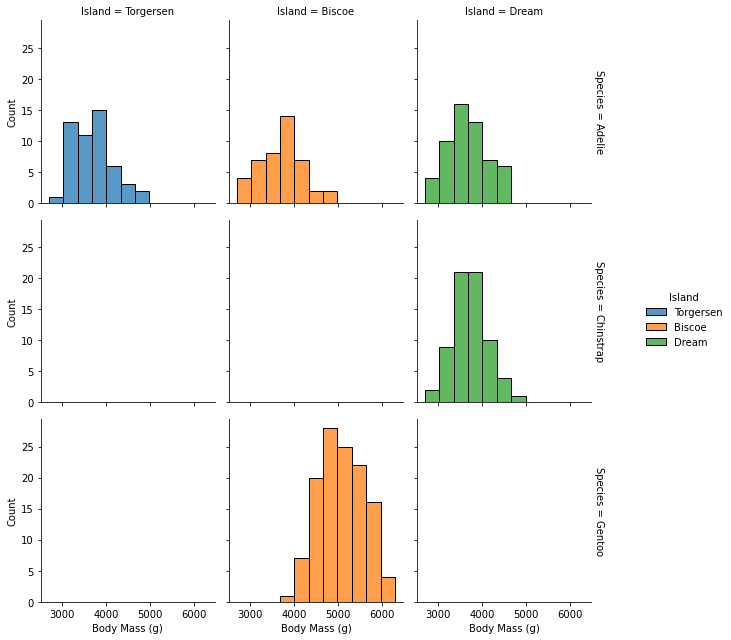

In [6]:
#histogram, body mass of each penguin grouped by island and species
penguins["Species"] = penguins["Species"].str.split().str.get(0)
sns.displot(
    penguins, x="Body Mass (g)", col="Island", row="Species", hue = "Island", facet_kws=dict(margin_titles=True),
    height = 3
)

In [7]:
Islands

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

#### Discusion of figure 1:

From these visualizations, we see that

### Table

Here we have ... 

In [6]:
penguins[["Body Mass (g)", "Island", "Species"]].groupby(["Island", "Species"]).describe()

Body Mass (g)                                           \
                            count         mean         std     min     25%   
Island    Species                                                            
Biscoe    Adelie             44.0  3709.659091  487.733722  2850.0  3387.5   
          Gentoo            123.0  5076.016260  504.116237  3950.0  4700.0   
Dream     Adelie             56.0  3688.392857  455.146437  2900.0  3387.5   
          Chinstrap          68.0  3733.088235  384.335081  2700.0  3487.5   
Torgersen Adelie             51.0  3706.372549  445.107940  2900.0  3337.5   

                                              
                        50%      75%     max  
Island    Species                             
Biscoe    Adelie     3750.0  3975.00  4775.0  
          Gentoo     5000.0  5500.00  6300.0  
Dream     Adelie     3575.0  3981.25  4650.0  
          Chinstrap  3700.0  3950.00  4800.0  
Torgersen Adelie     3700.0  4000.00  4700.0

#### Discussion of Table:

These statistic summaries show us...

### Figure 2. Scatterplot

Next we will use a scatterplot to visualize the relationship between Culmen Depth and Body Mass for penguins of different species.

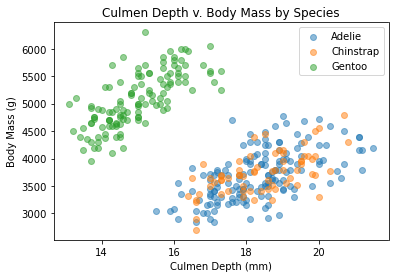

In [11]:
fig,ax = plt.subplots(1)
ax.set(xlabel="Culmen Depth (mm)",
       ylabel="Body Mass (g)",
       title="Culmen Depth v. Body Mass by Species")

penguins["Species"]=penguins["Species"].str.split().str.get(0)
uniqueSpecies=set(penguins["Species"])
for x in uniqueSpecies: 
    test = penguins[penguins["Species"]==x]
    ax.scatter(test["Culmen Depth (mm)"],
               test["Body Mass (g)"], alpha = 0.5, label = x)
ax.legend()

#### Discussion of figure 2:

In the figure above we can see that

## Feature Selection

## Modeling

## Discussion